# Week 11: Analyzing a brain activity video.

Today we analyze this video from Erik Duboue's lab: [BrainWideCalciumImage.gif](BrainWideCalciumImage.gif).

It shows a live zebrafish brain from above. Zebrafish are transparent enough that we can see inside their brain without cutting them open. Bright regions indicate a high concentration in calcium, which in turn indicates high neuronal activity. About half-way through the video the fish receives a stimulus which triggers a visible response: some regions light up. The goal of this activity is to analyze the duration of the response and the regions involved.

## 1. Loading images and videos

To work with images and videos we'll use the module `PIL` (Python Imaging Library). Try executing the import statement below. If you get an error, open the WinPython Command Prompt (on windows) or the terminal (on mac) and execute `pip install PIL`. The import statement below should now work.

In [1]:
# Import the module PIL.
import PIL
# Import the submodules Image (to work with images) and ImageSequence 
# (to iterate over the frames of a video) from module PIL.
from PIL import Image, ImageSequence

### 1.1. Loading an image

In [2]:
# Load an image.
img = Image.open('BrainWideCalciumImage_frame0.png')

# Show the image we just loaded.
# This should pop up a new window with the image in it.
img.show()

### 1.2. Accessing pixels

To perform quantitative analysis on this image, we need to convert it to a table of numbers. The image is 512 pixels by 512 pixels. Each pixel is represented by an integer between 0 and 255. 0 means black, 255 means white, and there are 254 shades of gray in between.

To perform the conversion we use the `array` command from the `numpy` module.

In [3]:
import numpy as np

# Convert the image into a numpy array.
img_data = np.array(img)

# Check that the array is 512x512.
print(img_data.shape)

(512, 512)


In [4]:
# Print the array.
print(img_data)
# It's too big for us to see all the values so we only see a few values in each of the 
# four corners of the image, all of which are nearly black (values in the 20's out of 255).

[[27 25 26 ..., 27 29 25]
 [27 26 27 ..., 26 27 28]
 [27 25 26 ..., 25 26 26]
 ..., 
 [29 27 31 ..., 28 29 29]
 [30 27 27 ..., 27 28 30]
 [28 28 28 ..., 30 28 29]]


This numpy array is a little like a list of lists where each inner list is a row. It's also quite like a pandas dataframe. Unlike a dataframe, you cannot access rows and columns by their name, only by their index. In week 8 we covered slicing pandas dataframes with `iloc`. Numpy arrays work exactly the same except you don't need to write `iloc`. For example, `img_data[i,j]` is the value of the pixel at row `i` and column `j`.

In [5]:
# This is the value of the pixel at row 0, column 0 (top left pixel).
# It's an integer between 0 and 255.
print(img_data[0,0])

# This is the value of the pixel at row 9, column 54.
# It's an integer between 0 and 255.
print(img_data[9,54])

27
25


In [6]:
# This is the values at row 9, every column. In other words, it is row 9.
# It is an array of 512 integers between 0 and 255.
print(img_data[9,:])

[28 26 28 28 26 27 27 27 27 27 29 27 28 27 27 27 28 27 26 28 27 30 28 28 28
 29 28 28 26 28 26 30 28 27 29 27 28 30 26 26 30 29 26 26 28 27 26 28 29 29
 29 27 28 30 25 24 28 28 27 27 28 28 28 27 28 27 28 27 27 27 28 29 27 28 29
 28 26 26 30 29 28 28 28 27 29 28 24 25 29 28 28 29 26 26 27 30 29 28 28 27
 27 27 27 28 28 30 29 28 27 26 28 28 28 27 27 28 28 28 29 30 28 27 27 28 28
 27 26 27 28 27 28 27 26 26 26 28 30 31 29 27 25 26 28 28 29 29 28 28 29 28
 28 29 27 26 27 27 26 28 28 28 26 27 29 29 28 29 29 28 26 27 29 28 27 27 28
 29 31 43 52 45 34 29 29 30 29 29 27 26 26 27 27 27 27 28 26 25 28 30 30 30
 27 26 28 29 28 27 28 28 26 25 27 28 27 27 26 27 28 28 27 27 26 27 29 29 28
 29 28 27 27 27 27 26 26 28 29 28 28 27 28 29 27 26 26 26 27 28 28 28 26 27
 28 29 28 28 26 26 26 27 28 28 28 28 29 29 29 27 26 27 27 25 27 29 28 29 28
 26 26 27 28 28 27 27 29 30 28 28 27 26 28 29 29 28 29 30 27 27 27 27 26 27
 28 28 28 27 25 26 28 28 27 27 27 26 26 28 29 27 27 28 28 27 27 27 27 28 29
 28 28 27 28

In [7]:
# This is the values at every row, column 2. In other words, it is column 2.
# It is an array of 512 integers between 0 and 255.
print(img_data[:,2])

[26 27 26 26 27 27 28 27 26 28 25 27 28 28 30 26 27 27 28 29 28 29 29 28 28
 30 27 27 29 27 28 28 28 27 29 30 29 30 27 29 30 28 30 28 27 30 27 28 29 30
 28 27 29 29 27 27 30 28 30 27 28 28 28 29 28 29 30 28 27 28 28 28 29 29 29
 28 29 29 29 28 28 30 30 28 29 28 28 26 28 29 28 28 31 29 29 30 29 29 28 29
 28 30 27 28 28 29 28 31 27 28 29 28 28 28 30 29 28 29 30 28 29 28 29 28 29
 30 28 29 28 26 29 28 30 25 28 28 28 28 28 28 30 28 27 27 29 28 28 28 29 28
 26 30 28 30 28 29 29 28 29 29 28 29 29 27 25 29 28 26 29 29 27 28 28 28 29
 29 30 29 28 28 29 27 29 29 29 28 28 29 29 28 28 28 27 28 27 28 28 28 27 29
 28 54 30 28 30 31 28 26 28 30 30 27 30 29 28 27 28 28 29 29 28 28 30 29 28
 26 29 28 28 28 29 28 27 28 30 30 28 30 28 28 35 28 30 27 28 27 29 29 28 29
 28 27 28 27 28 30 28 28 28 30 29 28 29 27 29 28 28 30 29 28 28 29 28 26 29
 28 29 29 30 28 27 29 28 28 27 29 29 30 29 30 27 31 28 29 27 27 28 28 27 29
 27 30 27 27 29 29 28 28 29 28 29 27 31 28 28 28 27 28 28 29 28 27 29 28 27
 28 29 28 28

In [8]:
# Every slicing operation we've discussed in the past can be used on either
# rows, columns, or both. As an example, here is the 2x2 square in the bottom 
# right corner of the image (last two rows, last two columns).
print(img_data[-2:,-2:])

[[28 30]
 [28 29]]


### 1.3. Plotting an image

`img.show()` is a convenient way to show a freshly loaded `PIL` image object, but it doesn't work on`numpy` arrays like `img_data`. Instead we use `imshow` from `matplotlib.pyplot`.

In [9]:
# Load the plotting module.
import matplotlib.pyplot as plt
# Changing the default plot size.
plt.rcParams['figure.figsize'] = 8,6
# Plot the image.
plt.imshow(img_data)
# Add a colorbar on the right side.
plt.colorbar()
# Display on screen.
plt.show()

<Figure size 800x600 with 2 Axes>

It may come as a surprise that the image is no longer gray. We haven't added any color information. PIt's just that pyplot's default way of plotting a 2D array of values is to show the lowest values in blue, the largest in yellow, and the ones in between in green.

The numbers on the vertical axis are pixel row numbers. They go from 0 at the top of the image to 512 at the bottom. The numbers on the horizontal axis show pixel column numbers. They go from 0 at the left edge of image to 512 at the right edge.

### 1.4. Loading a video

[BrainWideCalciumImage.gif](BrainWideCalciumImage.gif) has 101 frames, each of which is a 512 pixels by 512 pixels image. The code below opens it and converts it to a 101x512x512 numpy array.

In [10]:
# Open the video.
vid = Image.open('BrainWideCalciumImage.gif')

# Convert to a list of 512x512 numpy arrays, one for each of the 101 frames.
vid_data = []
for frame in ImageSequence.Iterator(vid):
    vid_data.append(np.array(frame))

# Convert that list to a single, three-dimensional, 101x512x512 numpy array.
vid_data = np.array(vid_data)

# Check that it has the correct dimensions:
print(vid_data.shape)

(101, 512, 512)


This new numpy array takes three indices: `vid_data[i,j,k]` is an integer between 0 and 255 indicating the brightness of the pixel in frame `i`, row `j`, column `k`. If each image in the video is a 2D data table with rows and columns, you may think of this as a 3D data table consisting of a series of image data tables stacked depth-wise.

You can use colon-based slicing on any of the three indices.

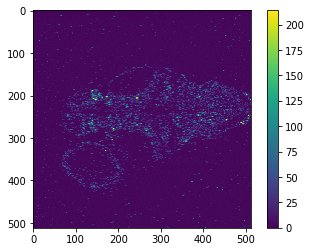

In [11]:
# This is frame 0, every row, every column. In other words, the first frame.
vid_data[0,:,:]

# Let's plot it.
plt.imshow(vid_data[0,:,:])
plt.colorbar()
plt.show()

In [12]:
# This is the first 10 frames, rows 0 to 255, columns 0 to 255. 
# In other words, the first second of the top left quarter of the video.
vid_data[:10,:256,:256]
# It is a 10x256x256 numpy array.
print(vid_data[:10,:256,:256].shape)

# There's nothing particularly meaningful about it, but it illustrates that 
# you can use slicing to cut and crop the video any way you want.

(10, 256, 256)


### 1.5. Computing means

We'll need to compute various types of means: mean brightness of a specific pixel over a range of frames, mean brightness of the entire image in a specific frame, etc.

`numpy` has a function `mean` that computes the mean of a list, data table, or array:

In [13]:
# This is the mean brightness of the entire video:
print(np.mean(vid_data))
# It's an average of the 101*512*512=26476544 values contained in the array,
# one for each pixel of each frame. It's a number between 0 and 255, but not 
# necessarily an integer any more. 
# It is quite low because most of the image is very dark.

# This is the average brightness of frame 0:
print(np.mean(vid_data[0,:,:]))
# It's an average of the 512*512=262144 values contained in the first frame, 
# one per pixel.

# This is the average brightness of frame 65:
print(np.mean(vid_data[65,:,:]))
# Frame 65 is a little brighter than frame 0 because it's shortly after the stimulus, 
# but not that much brighter because most of the image just remained dark.

# This is the average brightness of the bottom right pixel over the entire video:
print(np.mean(vid_data[:,-1,-1]))
# It's an average of the 101 values taken by that pixel over the course of the video,
# one value per frame.

7.83938757264
7.7361831665
8.48742294312
5.11881188119


## 2. Locating the response in time

Eventually we want to study the brain's activity while it's responding to the stimulus and compare it to the activity before the stimulus. But first, we need to decide on which belong to the pre-stimulus activity and which ones belong to the response. Looking at the video (just open the gif outside of python), it looks like there's an overall increase in activity towards about 6 seconds in. To get more precise, we now plot the overall brightness against the frame index.

<div class="alert alert-block alert-danger">
<b>Task 1:</b>
Plot the mean brightness of the video as a function of the frame index. Then, zoom in to see where exactly the response starts and ends.
</div>

*Outline:* Start an empty list. Loop over the frames. For each frame, compute the mean brightness of that frame and add it to the list. At the end, plot the mean brightness against the frame index (you don't need x values, the indices of the list are frames' indices).  

There's a more efficient way to do this, but it's a little harder to wrap your mind around. The `numpy.mean` function has an `axis` option that lets you compute partial averages by specifying which indices (first index=axis 0, second index=axis 1, and so on) to average over.

<div class="alert alert-block alert-danger">
<b>Extra Task 1:</b>
Look up the online documentation of `numpy.mean`, particularly the `axis` option and the corresponding example at the end. Use the `axis` option to solve task 1. This solution should contain no loop (well technically there's still a loop but it's hidden inside numpy).
</div>

The increased activity we noticed by eye shows up as a peak bewtween frames ~60-80.

## 3. Locating the response in space

Where is the increased activity located in the brain? To find out, let's compare the average activity over frames 0-60 and the one over frames 60-80, then plot an activity increase map.

<div class="alert alert-block alert-danger">
<b>Task 2a:</b>
Compute the average brightness of the top left pixel over frames 0 to 60.
</div>

*Outline:* 
Use a slice to extract the 60 brightness values from `vid_data`, then  compute the average with `numpy.mean`.

<div class="alert alert-block alert-danger">
<b>Task 2b:</b>
Compute the average brightness of each of the top row's pixels over frames 0 to 60. Return the result as a list with 512 values, one for each pixel in the top row.
</div>

*Outline:* 
Create an empty list. Loop over the column indices of the pixels in the first row. Inside the loop, use a slice to extract the brightness of the current pixel in frames 0 to 60. Compute the average of those 61 values and add it to the list.

<div class="alert alert-block alert-danger">
<b>Task 2c:</b>
Compute the average brightness of every pixel over frames 0 to 60. Return the result as a list containing 512 lists of 512 values where each of the inner lists represents a row. Plot it with `imshow`.
</div>

*Outline:* 
Create an empty outer list. Loop over the row indices. For each row, use task 2b to compute the list of the average brightnesses of every pixel in that row over frames 0-60. Add that list to the outer list. *It's normal for this to take a few seconds to execute.*

<div class="alert alert-block alert-danger">
<b>Task 3:</b>
Repeat tasks 2abc with frames 60 to 80 instead of 0 to 60. Save the result in a different list of lists.
</div>

<div class="alert alert-block alert-danger">
<b>Task 4:</b>
Compute the change in brightness from frames 0-60 to frames 60-80 at each pixel (subtract the average over frames 0-60 from the average over frames 60-80). The result should be a 512x512 array which you'll plot with `pyplot.imshow`. Comment on the result.
</div>

*Hint:* You can convert a list or a list of lists `l` to a numpy array `a` with `a = np.array(l)`. Like pandas data tables, you can add (or subtract) two arrays that have the same size in all directions (rows and columns). The result will have the same size as the two input arrays, and each element in the result will be the sum (or difference) of the two elements located on the same row and column in the two input arrays.

## 4. From pixels to neurons (extra tasks only)

The file `segmentation.txt` contains information about which pixel belongs to which neuron in the fish's brain. It was obtained by performing a [watershed segmentation](https://en.wikipedia.org/wiki/Watershed_(image_processing%29) on the image obtained by averaging all the frames together. It contains 512 lines with 512 integer values each, one for each pixel in a frame of the video. We can use it to compute the activity of a specific neuron as a function of time.

In [23]:
# Loading the segmentation data into a numpy array.
seg = np.loadtxt('segmentation.txt',dtype=int)
# seg is a 512x512 array of integers, one for each pixel of the images. 
# The value of each pixel is the index of the neuron it belongs to.
# Some values are not really neurons, for example 0 is the outside
# of the brain.
print(seg.shape)

# The values go from 0 to 1571 corresponding to the 1572 distinct regions 
# identifed by the watershed segmentation.
print(seg.min(),seg.max())

(512, 512)
0 1571


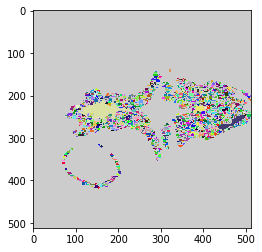

In [24]:
# Here is what the regions look like.
from matplotlib.colors import ListedColormap
np.random.seed(4)
cmap = ListedColormap([(0.8,)*3]+np.random.rand(1571,3).tolist())
plt.imshow(seg,cmap=cmap)
plt.show()

Some of those regions are clearly not neurons. One is the outside of the brain. Others may be bone or other non brain tissue. Some may just be artifacts of the segmentation algorithm.

<div class="alert alert-block alert-danger">
<b>Extra Task 2:</b>
Build a list of the pixels in the neuron with index 100 in the segmentation. Each pixel should consist of a (row index, column index) pair.
</div>

*Outline:* 
Create an empty list. Loop over the pixels of `seg` (outer loop over row indices, inner loop over column indices). For each pixel, if its value is 100, create a pair with its row index and column index and add it to the list of pixels of neuron 100.

Now that we have the list of pixels in region 100, we can retrieve the brightness at each of them to compute the mean brightness of neuron 100 in each frame.

<div class="alert alert-block alert-danger">
<b>Extra Task 3:</b>
Plot the mean brightness of region 100 as a function of time.
</div>

*Outline:* Create an empty list that will hold the region's average brightness in each frame. Loop over the frames. In each frame, create a list of the brightness of every pixel in that region using `vid_data` and the list of pixel coordinates in region 100 from the previous task. Compute the average of that list and add the result to the list you created at the beginning. Once you're done, plot that list with `pyplot.plot`.